Try out the ability to select only a few rafts from the camera geometry

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
from lsst.sims.maf.plots import PlotHandler
import healpy as hp

In [13]:
# Set the database and query
database = 'enigma_1189_sqlite.db'
#sqlWhere = 'filter = "r" and night < 400'
opsdb = db.OpsimDatabase(database)
outDir = 'Camera'
resultsDb = db.ResultsDb(outDir=outDir)
nside=512

In [14]:
rafts = ['R:0,1', 'R:0,2', 'R:0,3',
         'R:1,0', 'R:1,1', 'R:1,2', 'R:1,3', 'R:1,4',
         'R:2,0', 'R:2,1', 'R:2,2', 'R:2,3', 'R:2,4',
         'R:3,0', 'R:3,1', 'R:3,2', 'R:3,3', 'R:3,4',
         'R:4,1', 'R:4,2', 'R:4,3',
        ]
chips = ['S:0,0', 'S:0,1', 'S:0,2',
        'S:1,0', 'S:1,1', 'S:1,2',
        'S:2,0', 'S:2,1', 'S:2,2']
allChips =[]
for raft in rafts:
    for chip in chips:
        allChips.append(raft+' '+chip)

In [15]:
sqlWhere = 'filter = "r" and expMJD < 49547.36 and fieldRA < %f and fieldDec > %f and fieldDec < 0' % (np.radians(15.), np.radians(-15.))
metric = metrics.Coaddm5Metric()
slicer = slicers.HealpixSlicer(nside=nside, useCamera=True, chipNames=allChips)

Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes


Querying database with constraint filter = "r" and expMJD < 49547.36 and fieldRA < 0.261799 and fieldDec > -0.261799 and fieldDec < 0
Found 1 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter = "r" and expMJD < 49547.36 and fieldRA < 0.261799 and fieldDec > -0.261799 and fieldDec < 0 sqlconstraint now.
monopole: 24.4876  dipole: lon: 0, lat: 90, amp: 7.45058e-09
Plotting complete.


Optimal bin calculation calculated NaN: returning 200
Only one metric value, making a guess at a good histogram range.


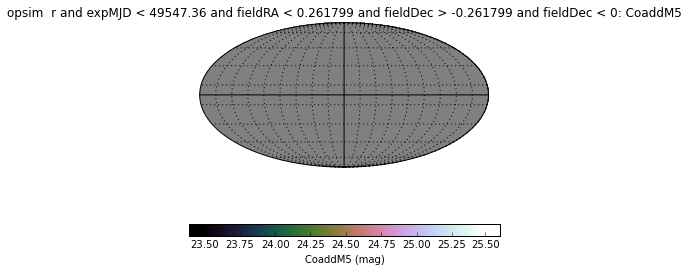

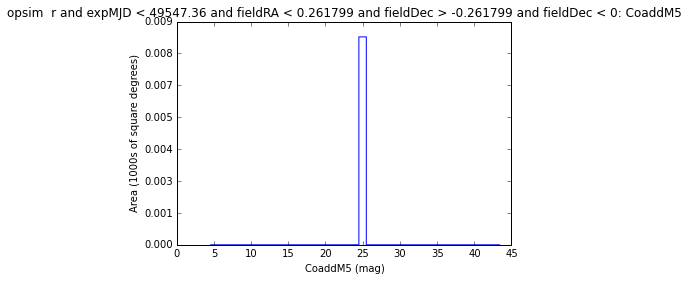

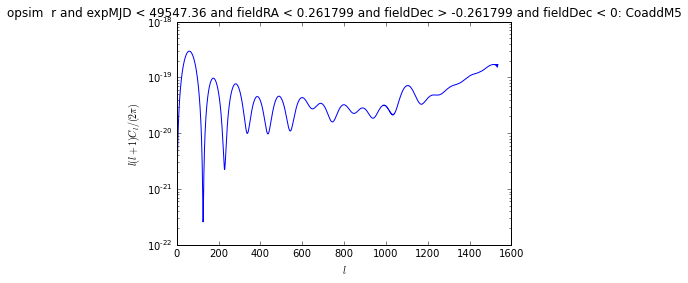

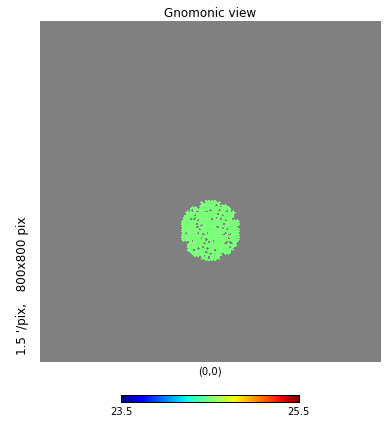

In [16]:
bundle = metricBundles.MetricBundle(metric,slicer,sqlWhere)
bg = metricBundles.MetricBundleGroup({0:bundle},opsdb, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)
hp.gnomview(bundle.metricValues, xsize=800,ysize=800, rot=(0,0,0))

In [17]:
# Now let's use every-other chip
halfChips = []
for raft in rafts[0::2]:
    for chip in chips:
        halfChips.append(raft+' '+chip)

In [18]:
slicer = slicers.HealpixSlicer(nside=nside, useCamera=True, chipNames=halfChips)

Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes


Querying database with constraint filter = "r" and expMJD < 49547.36 and fieldRA < 0.261799 and fieldDec > -0.261799 and fieldDec < 0
Found 1 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter = "r" and expMJD < 49547.36 and fieldRA < 0.261799 and fieldDec > -0.261799 and fieldDec < 0 sqlconstraint now.
monopole: 24.4876  dipole: lon: -179.999, lat: 0, amp: 4.76837e-07
Plotting complete.


Optimal bin calculation calculated NaN: returning 200
Only one metric value, making a guess at a good histogram range.


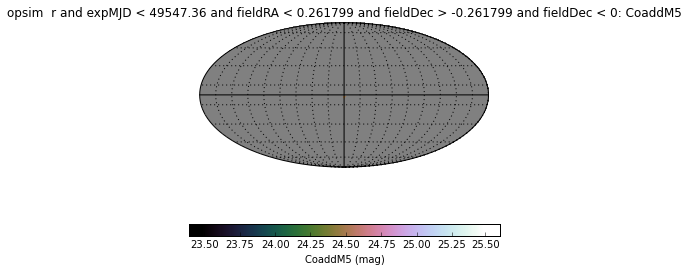

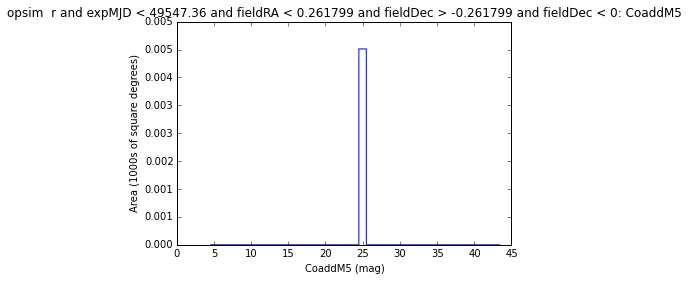

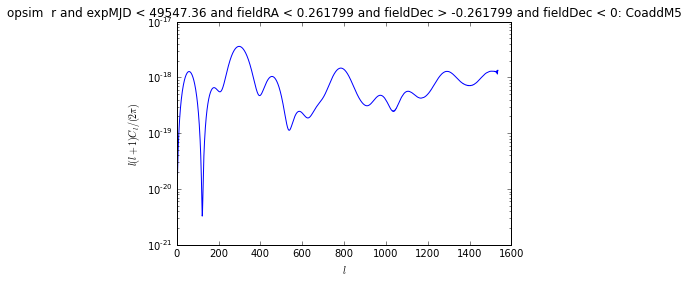

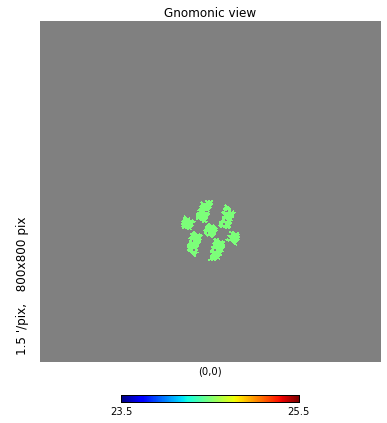

In [19]:
bundle = metricBundles.MetricBundle(metric,slicer,sqlWhere)
bg = metricBundles.MetricBundleGroup({0:bundle},opsdb, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)
hp.gnomview(bundle.metricValues, xsize=800,ysize=800, rot=(0,0,0))

I think raft 0,0 is the lower left in this image (there's a slight rotation).  Note that the chip name info is also passed to the metric with the other slicePoint info, so metrics can also use the chip name info if they want to.